# Projet EDA sur la prévision du taux de désabonnement des télécommunications

Le taux de désabonnement est l'un des plus gros problèmes de l'industrie des télécommunications. Des recherches ont montré que le taux de désabonnement mensuel moyen parmi les 4 principaux opérateurs de téléphonie mobile aux États-Unis est de 1,9 % à 2 %.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick

## Lisons le fichier de données dans Google Colab

In [ ]:
# Charger le dataset dans un dataframe pandas
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [ ]:
# Vérifier la taille du DataFrame
df.shape


(7043, 21)

In [ ]:
#afficher les colonnes
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

**customerID**: Identifiant unique attribué à chaque client de l'entreprise de télécommunications.

**gender**: Le genre du client, généralement représenté par des catégories telles que "Male" (homme) et "Female" (femme).

**SeniorCitizen**: Une variable binaire indiquant si le client est un citoyen senior (1) ou non (0).

**Partner**: Une variable binaire indiquant si le client a un partenaire (1) ou non (0).

**Dependents**: Une variable binaire indiquant si le client a des personnes à charge (1) ou non (0).

***tenure***: La durée de l'abonnement du client auprès de l'entreprise de télécommunications, mesurée en mois.

**PhoneService**: Une variable binaire indiquant si le client a un service téléphonique (1) ou non (0).

**MultipleLines**: Une variable catégorielle indiquant si le client a plusieurs lignes téléphoniques, avec des valeurs telles que "Yes" (Oui), "No" (Non), et "No phone service" (Pas de service téléphonique).

**InternetService**: Le type de service Internet souscrit par le client, avec des catégories telles que "DSL", "Fiber optic", et "No" (Pas de service Internet).

**OnlineSecurity**: Une variable catégorielle indiquant si le client a un service de sécurité en ligne, avec des valeurs telles que "Yes", "No", et "No internet service" (Pas de service Internet).

**OnlineBackup**: Une variable catégorielle indiquant si le client a une sauvegarde en ligne, avec des valeurs telles que "Yes", "No", et "No internet service" (Pas de service Internet).

**DeviceProtection**: Une variable catégorielle indiquant si le client a une protection de l'appareil, avec des valeurs telles que "Yes", "No", et "No internet service" (Pas de service Internet).

**TechSupport**: Une variable catégorielle indiquant si le client a un support technique, avec des valeurs telles que "Yes", "No", et "No internet service" (Pas de service Internet).

**StreamingTV**: Une variable catégorielle indiquant si le client a un service de streaming TV, avec des valeurs telles que "Yes", "No", et "No internet service" (Pas de service Internet).

**StreamingMovies**: Une variable catégorielle indiquant si le client a un service de streaming de films, avec des valeurs telles que "Yes", "No", et "No internet service" (Pas de service Internet).

**Contract**: Le type de contrat du client, avec des catégories telles que "Month-to-month" (Mois à mois), "One year" (Un an), et "Two year" (Deux ans).

**PaperlessBilling**: Une variable binaire indiquant si le client utilise une facturation électronique (1) ou non (0).

**PaymentMethod**: Le mode de paiement utilisé par le client, avec des catégories telles que "Electronic check" (Chèque électronique), "Mailed check" (Chèque envoyé par courrier), "Bank transfer" (Virement bancaire), et "Credit card" (Carte de crédit).

**MonthlyCharges**: Le montant facturé au client chaque mois pour les services utilisés.

**TotalCharges**: Le montant total facturé au client depuis le début de son abonnement.

***Churn***: Une variable binaire indiquant si le client a résilié son abonnement (1) ou non (0).

## Manipulons les données pour voir s'il y a des valeurs manquantes.

In [ ]:
# Vérifier les types de données des colonnes
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [ ]:
# Converting Total Charges to a numerical data type.
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

Après avoir examiné la sortie ci-dessus, nous pouvons dire qu'il y a 11 valeurs manquantes pour les charges totales. Remplaçons supprimons ces 11 lignes de notre ensemble de données

## Nettoyons les données

In [ ]:
# Supprimer les valeurs manquantes
df.dropna(inplace = True)

In [ ]:
# Supprimer les colonnes inutiles ou redondantes
df.drop(['customerID'], axis=1, inplace=True)


En effet l'ID de client n'a pas une influence sur Le taux de désabonnement

In [ ]:
# Convertir la variable prédictive en une variable numérique binaire
df["Churn"] = df["Churn"].map({"Yes": 1, "No": 0})

In [ ]:
#Convertir toutes les variables catégorielles en variables muettes
df_dummies = pd.get_dummies(df)

In [ ]:
# Supprimer les doublons
df.drop_duplicates(inplace=True)

In [ ]:
#checking du donnée aprés nettoyage
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,0
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,0
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,1


## Quelque calcule à propos la résiliation

In [ ]:
# Vérifier le nombre de clients ayant résilié leur abonnement
print(df["Churn"].value_counts())

0    5153
1    1857
Name: Churn, dtype: int64


In [ ]:
# Calculer le taux de résiliation global
churn_rate = np.mean(df["Churn"])
print("Taux de résiliation global : {:.2%}".format(churn_rate))

Taux de résiliation global : 26.49%


## La corrélation

<Axes: >

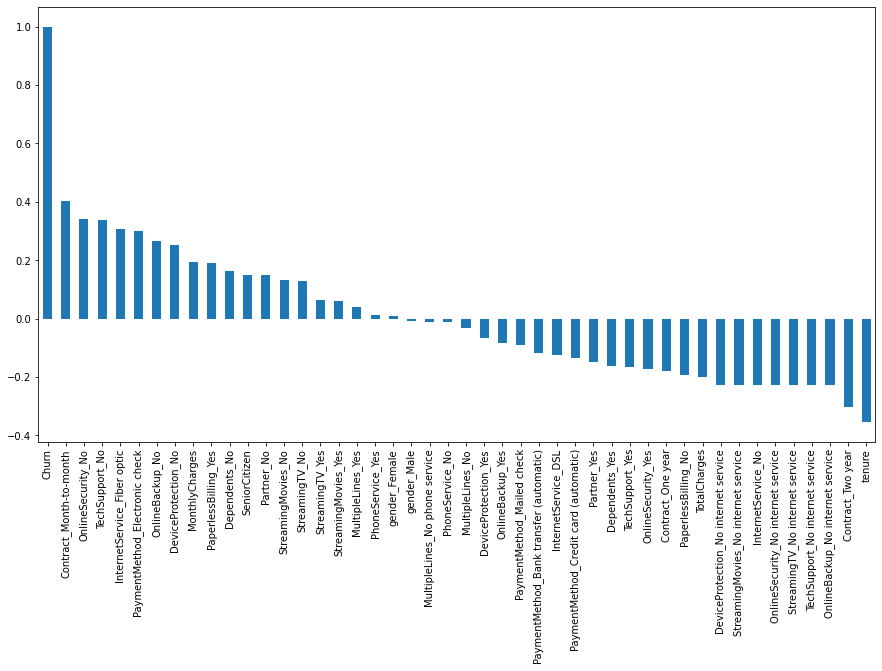

In [ ]:
#La Corrélation de "Churn" avec d'autres variables :
plt.figure(figsize=(15,8))
df_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

Les contrats mensuels, l'absence de sécurité en ligne et de support technique semblent être positivement corrélés avec le taux de désabonnement. Tandis que l'ancienneté, les contrats de deux ans semblent être corrélés négativement avec le taux de désabonnement.

Fait intéressant, des services tels que la sécurité en ligne, la télévision en streaming, la sauvegarde en ligne, le support technique, etc. sans connexion Internet semblent être négativement liés au désabonnement.

## Exploration des données

Commençons d'abord par explorer notre ensemble de données, afin de mieux comprendre les modèles dans les données et éventuellement de formuler des hypothèses. Nous allons d'abord examiner la distribution des variables individuelles, puis découper et découper nos données pour toute tendance intéressante.

### Répartition par sexe

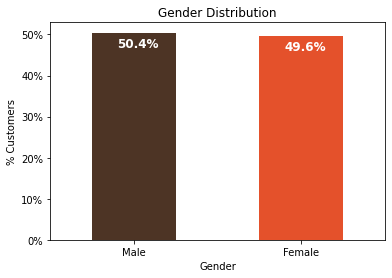

In [ ]:
colors = ['#4D3425','#E4512B']
ax = (df['gender'].value_counts()*100.0 /len(df)).plot(kind='bar',
                                                        stacked = True,
                                                        rot = 0,
                                                        color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers')
ax.set_xlabel('Gender')
ax.set_ylabel('% Customers')
ax.set_title('Gender Distribution')

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x()+.15, i.get_height()-3.5, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=12,
            color='white',
           weight = 'bold')




Environ la moitié des clients de notre ensemble de données sont des hommes tandis que l'autre moitié sont des femmes





### Répartition par age

Text(0.5, 1.0, '% of Senior Citizens')

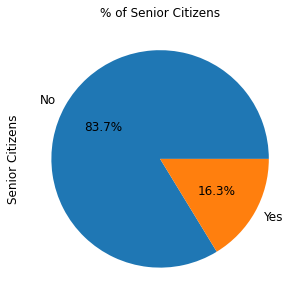

In [ ]:
ax = (df['SeniorCitizen'].value_counts()*100.0 /len(df))\
.plot.pie(autopct='%.1f%%', labels = ['No', 'Yes'],figsize =(5,5), fontsize = 12 )
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('Senior Citizens',fontsize = 12)
ax.set_title('% of Senior Citizens', fontsize = 12)


Il n'y a que 16% des clients qui sont des personnes âgées. Ainsi, la plupart de nos clients dans les données sont des jeunes.

### Statut de partenaire et de personne à charge

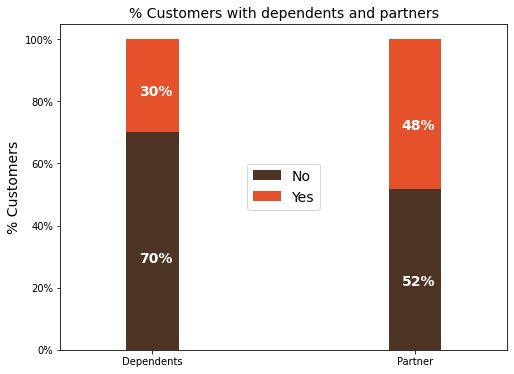

In [ ]:
telecom_cust = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df2 = pd.melt(telecom_cust, id_vars=['customerID'], value_vars=['Dependents','Partner'])
df3 = df2.groupby(['variable','value']).count().unstack()
df3 = df3*100/len(telecom_cust)
colors = ['#4D3425','#E4512B']
ax = df3.loc[:,'customerID'].plot.bar(stacked=True, color=colors,
                                      figsize=(8,6),rot = 0,
                                     width = 0.2)

ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers',size = 14)
ax.set_xlabel('')
ax.set_title('% Customers with dependents and partners',size = 14)
ax.legend(loc = 'center',prop={'size':14})

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)

Environ 50 % des clients ont un partenaire, tandis que seulement 30 % du total des clients ont des personnes à charge.

### % de clients, qui ont des partenaires, ont aussi des personnes à charge

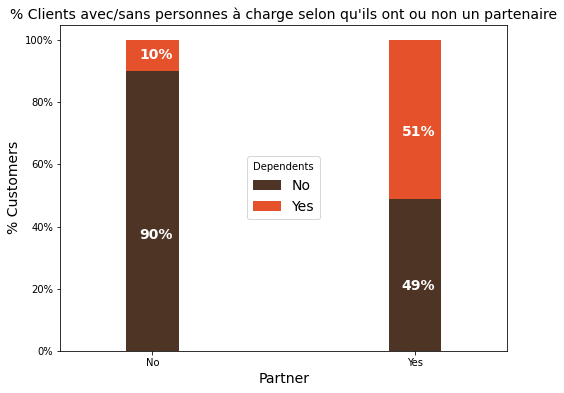

In [ ]:
colors = ['#4D3425','#E4512B']
partner_dependents = df.groupby(['Partner','Dependents']).size().unstack()

ax = (partner_dependents.T*100.0 / partner_dependents.T.sum()).T.plot(kind='bar',
                                                                width = 0.2,
                                                                stacked = True,
                                                                rot = 0,
                                                                figsize = (8,6),
                                                                color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='center',prop={'size':14},title = 'Dependents',fontsize =14)
ax.set_ylabel('% Customers',size = 14)
ax.set_title("% Clients avec/sans personnes à charge selon qu'ils ont ou non un partenaire",size = 14)
ax.xaxis.label.set_size(14)

# Code pour ajouter les étiquettes de données sur le graphique à barres empilées
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)

Fait intéressant, parmi les clients qui ont un partenaire, seulement environ la moitié d'entre eux ont également une personne à charge, tandis que l'autre moitié n'a pas d'indépendants. De plus, comme prévu, parmi les clients qui n'ont pas de partenaire, une majorité (90%) d'entre eux n'ont pas de personnes à charge .

### Informations sur le compte client

#### Tenure

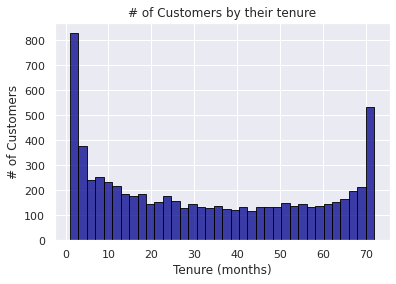

In [ ]:
sns.set(style="darkgrid")
ax = sns.histplot(data=df, x='tenure', bins=int(180/5), color='darkblue', edgecolor='black')
ax.set_ylabel('# of Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('# of Customers by their tenure')
plt.show()

Après avoir examiné l'histogramme , nous pouvons voir que de nombreux clients sont avec la société de télécommunications depuis un mois seulement, alors qu'un bon nombre sont là depuis environ 72 mois. Cela peut être dû au fait que différents clients ont des contrats différents. Ainsi, en fonction du contrat qu'ils ont conclu, il pourrait être plus/moins facile pour les clients de rester/quitter l'entreprise de télécommunications.

#### Contracts

Text(0.5, 1.0, '# of Customers by Contract Type')

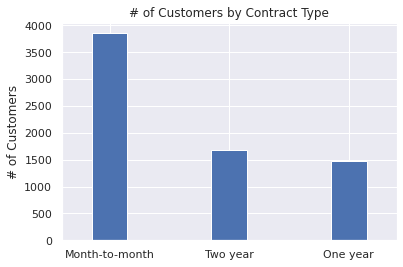

In [ ]:
ax = df['Contract'].value_counts().plot(kind = 'bar',rot = 0, width = 0.3)
ax.set_ylabel('# of Customers')
ax.set_title('# of Customers by Contract Type')

Comme nous pouvons le voir sur ce graphique, la plupart des clients sont sous contrat mensuel. Alors qu'il y a un nombre égal de clients dans les contrats de 1 an et de 2 ans.

Ci-dessous, nous comprendrons le mandat des clients en fonction de leur type de contrat.

<ipython-input-27-8a3d249b7422>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df[df['Contract']=='Month-to-month']['tenure'],
<ipython-input-27-8a3d249b7422>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df[df['Contract']=='One year']['tenure'],
<ipython-input-27-8a3d249b7422>:2

Text(0.5, 1.0, 'Two Year Contract')

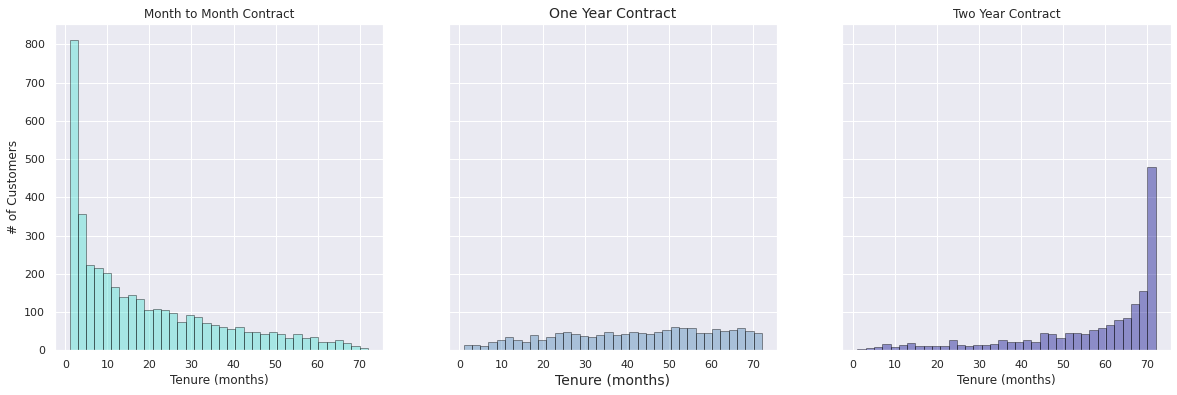

In [ ]:
fig, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3, sharey = True, figsize = (20,6))

ax = sns.distplot(df[df['Contract']=='Month-to-month']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'turquoise',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax1)
ax.set_ylabel('# of Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('Month to Month Contract')

ax = sns.distplot(df[df['Contract']=='One year']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'steelblue',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax2)
ax.set_xlabel('Tenure (months)',size = 14)
ax.set_title('One Year Contract',size = 14)

ax = sns.distplot(df[df['Contract']=='Two year']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'darkblue',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax3)

ax.set_xlabel('Tenure (months)')
ax.set_title('Two Year Contract')

Fait intéressant, la plupart des contrats mensuels durent 1 à 2 mois, tandis que les contrats de 2 ans ont tendance à durer environ 70 mois. Cela montre que les clients qui prennent un contrat plus long sont plus fidèles à l'entreprise et ont tendance à rester avec elle plus longtemps.

C'est également ce que nous avons vu dans le graphique précédent sur la corrélation avec le taux de désabonnement.

### répartition des différents services

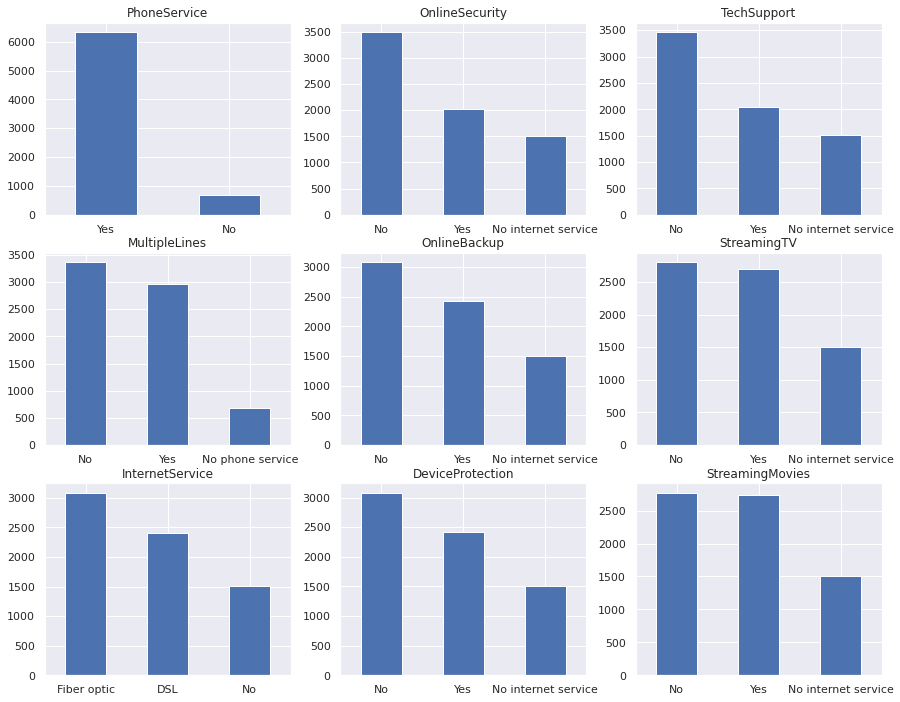

In [ ]:
services = ['PhoneService','MultipleLines','InternetService','OnlineSecurity',
           'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']

fig, axes = plt.subplots(nrows = 3,ncols = 3,figsize = (15,12))
for i, item in enumerate(services):
    if i < 3:
        ax = df[item].value_counts().plot(kind = 'bar',ax=axes[i,0],rot = 0)

    elif i >=3 and i < 6:
        ax = df[item].value_counts().plot(kind = 'bar',ax=axes[i-3,1],rot = 0)

    elif i < 9:
        ax = df[item].value_counts().plot(kind = 'bar',ax=axes[i-6,2],rot = 0)
    ax.set_title(item)

### la relation entre les frais mensuels et totaux

/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='MonthlyCharges', ylabel='TotalCharges'>

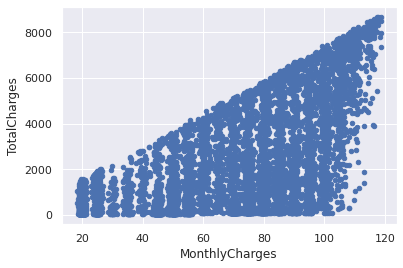

In [ ]:
df[['MonthlyCharges', 'TotalCharges']].plot.scatter(x = 'MonthlyCharges',
                                                              y='TotalCharges')

les frais totaux augmentent à mesure que la facture mensuelle d'un client augmente.

### examination de la variable Churn

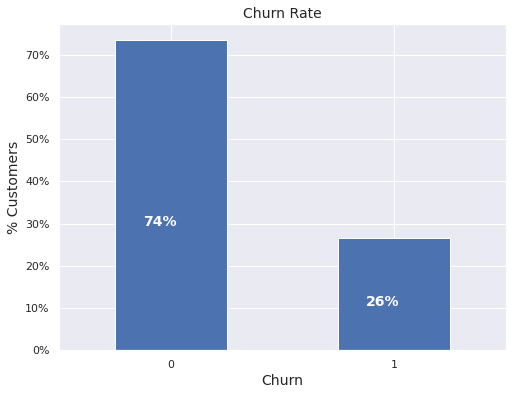

In [ ]:
ax = (df['Churn'].value_counts()*100.0 /len(df)).plot(kind='bar', stacked = True, rot = 0,figsize = (8,6))
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers',size = 14)
ax.set_xlabel('Churn',size = 14)
ax.set_title('Churn Rate', size = 14)

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)

Dans nos données, 74 % des clients ne se désabonnent pas. De toute évidence, les données sont faussées car nous nous attendrions à ce qu'une grande majorité des clients ne se désabonnent pas.

#### Churn vs Tenure

<Axes: xlabel='Churn', ylabel='tenure'>

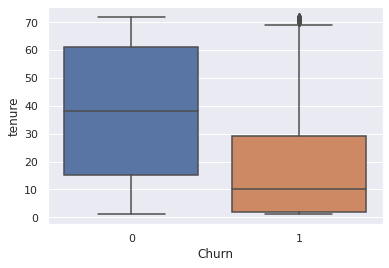

In [ ]:
sns.boxplot(x = df.Churn, y = df.tenure)

les clients qui ne se désintéressent pas ont tendance à rester plus longtemps avec la société de télécommunications.

#### par type de contrat

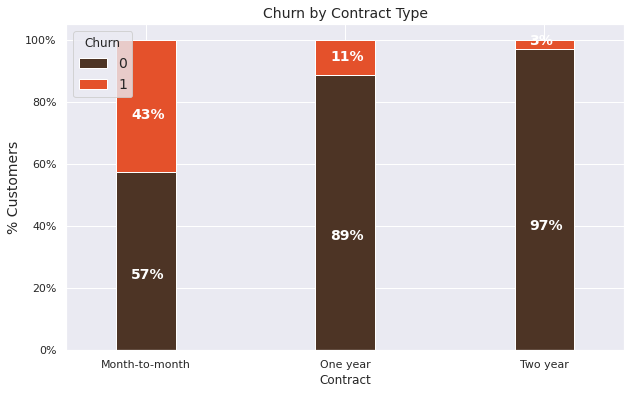

In [ ]:
colors = ['#4D3425','#E4512B']
contract_churn = df.groupby(['Contract','Churn']).size().unstack()

ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.3,
                                                                stacked = True,
                                                                rot = 0,
                                                                figsize = (10,6),
                                                                color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='best',prop={'size':14},title = 'Churn')
ax.set_ylabel('% Customers',size = 14)
ax.set_title('Churn by Contract Type',size = 14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)

Semblable à ce que nous avons vu dans le diagramme de corrélation, les clients qui ont un contrat mensuel ont un taux de désabonnement très élevé.

#### par ancienneté

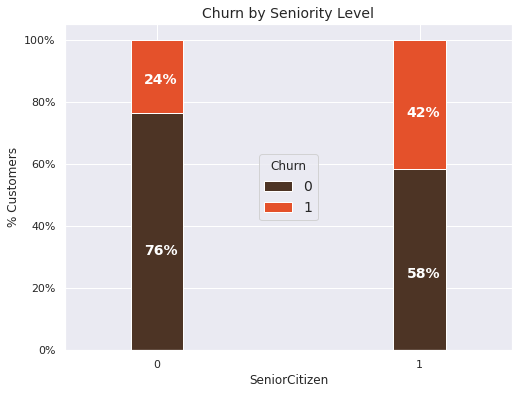

In [ ]:
colors = ['#4D3425','#E4512B']
seniority_churn = df.groupby(['SeniorCitizen','Churn']).size().unstack()

ax = (seniority_churn.T*100.0 / seniority_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.2,
                                                                stacked = True,
                                                                rot = 0,
                                                                figsize = (8,6),
                                                                color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='center',prop={'size':14},title = 'Churn')
ax.set_ylabel('% Customers')
ax.set_title('Churn by Seniority Level',size = 14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',size =14)

Les seniors ont presque le double du taux de désabonnement que la population plus jeune

#### par frais mensuels

<ipython-input-50-546dea8a96f3>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(telecom_cust.MonthlyCharges[(telecom_cust["Churn"] == 'No') ],
<ipython-input-50-546dea8a96f3>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(telecom_cust.MonthlyCharges[(telecom_cust["Churn"] == 'Yes') ],


Text(0.5, 1.0, 'Distribution of monthly charges by churn')

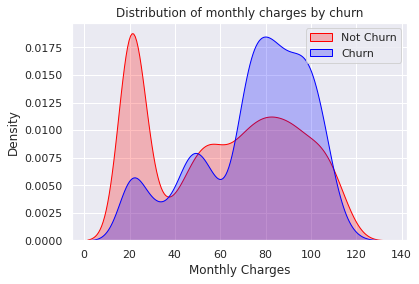

In [ ]:
ax = sns.kdeplot(telecom_cust.MonthlyCharges[(telecom_cust["Churn"] == 'No') ],
                color="Red", shade = True)
ax = sns.kdeplot(telecom_cust.MonthlyCharges[(telecom_cust["Churn"] == 'Yes') ],
                ax =ax, color="Blue", shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Monthly Charges')
ax.set_title('Distribution of monthly charges by churn')

Un pourcentage plus élevé de clients abandonnent lorsque les frais mensuels sont élevés.

## Prédiction